# Exercise 2 - Optional - Classification on MNIST

Using the SciKit Learn toolkit, train a multi-class logistic regression on the MNIST problem and compare the performances with the KNN of PW2.

For the “daring” ones, implement a multi-class version based on your own implementation and run it against MNIST data.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [38]:
train = pd.read_csv('mnist_train.csv')#[:1000]
X_train = train.drop('label', axis=1).values.reshape(-1,28*28)
y_train = train['label'].values

test = pd.read_csv('mnist_test.csv')#[:1000]
X_test = test.drop('label', axis=1).values.reshape(-1,28*28)
y_test = test['label'].values

In [39]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


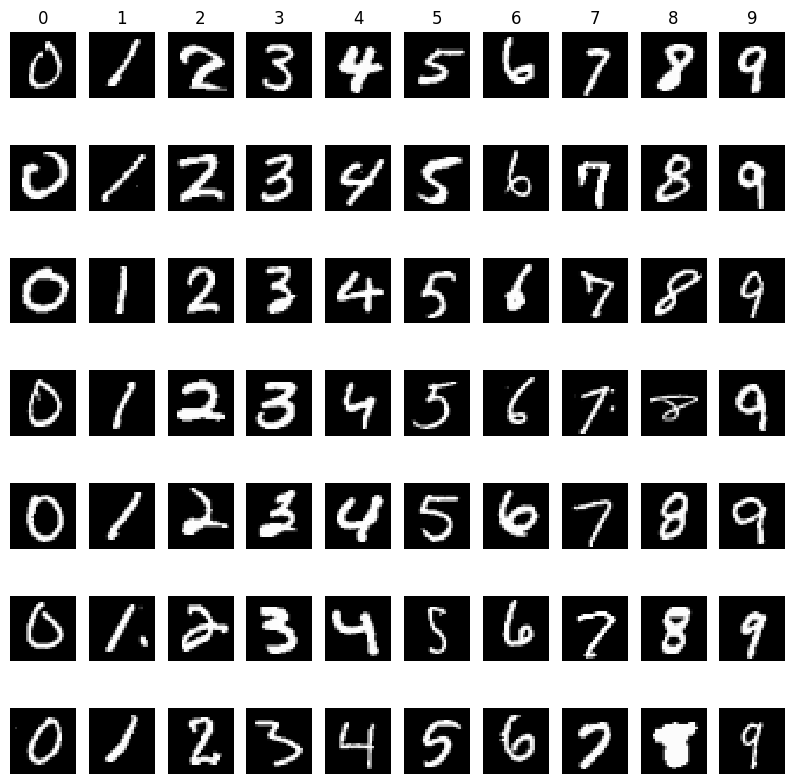

In [40]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape(28, 28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [42]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/pascal/venv/MachLe/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [43]:
predictions = model.predict(X_test)
print(f"Accuracy : {metrics.accuracy_score(y_test, predictions)}")

Accuracy : 0.9209


In [44]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
print(f"Accuracy for knn : {metrics.accuracy_score(y_test, predictions_knn)}")

Accuracy for knn : 0.9688
